# EA Two
Just doing some recleaning and maybe simple regression

In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

import folium
import geopandas as gpd
from folium.plugins import HeatMap

import pandas as pd
import json
from json import loads, dumps

In [2]:
measures_df = pd.read_csv("./HCAHPSPatientSurveyFiles/data_tables/measures.csv")
reports_df = pd.read_csv('./HCAHPSPatientSurveyFiles/data_tables/reports.csv')
national_results_df = pd.read_csv('./HCAHPSPatientSurveyFiles/data_tables/national_results.csv')
questions_df = pd.read_csv('./HCAHPSPatientSurveyFiles/data_tables/questions.csv')
responses_df = pd.read_csv('./HCAHPSPatientSurveyFiles/data_tables/responses.csv')
state_results_df = pd.read_csv('./HCAHPSPatientSurveyFiles/data_tables/state_results.csv')
states_df = pd.read_csv('./HCAHPSPatientSurveyFiles/data_tables/states.csv')

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)
path = "./HCAHPSPatientSurveyFiles/data_tables/"

In [4]:
##For future reference put in list and iterate through list.  Might save on lines of code but unsure of speed
#Strip Whitespace from columns
measures_strip = measures_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
national_results_strip_df = national_results_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
questions_strip_df = questions_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
reports_strip_df = reports_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
responses_strip_df = responses_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
states_strip_df = states_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
state_results_strip_df = state_results_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [5]:
states_strip_df.head()

,State,State Name,Region
0,AK,Alaska,Pacific
1,AL,Alabama,East South Central
2,AR,Arkansas,West South Central
3,AZ,Arizona,Mountain
4,CA,California,Pacific


In [6]:
##Converting to date/time results in adding the 1st day of the month.
national_results_strip_df['Release Period'] = pd.to_datetime(national_results_strip_df['Release Period'], format='%m_%Y')

In [7]:
responses_strip_df['Release Period'] = pd.to_datetime(responses_strip_df['Release Period'], format='%m_%Y')

In [8]:
state_results_strip_df['Release Period'] = pd.to_datetime(state_results_strip_df['Release Period'], format='%m_%Y')

In [9]:
responses_strip_df['Completed Surveys'].replace({"FEWER THAN 50": '25', "300 or more": '300',
                                                   "Between 100 and 299":'250',"Fewer than 100":'50'}, inplace=True)

not_available = responses_strip_df[ (responses_strip_df['Response Rate (%)'] == 'Not Available')].index
responses_strip_df.drop(not_available , inplace=True)

In [10]:
#convert Completed Surveys string to int64
responses_strip_df['Completed Surveys'] = responses_strip_df['Completed Surveys'].astype(np.int64)

In [11]:
##Convert Response Rate to int64
responses_strip_df['Response Rate (%)'] = responses_strip_df['Response Rate (%)'].astype(np.int64)

In [12]:
state_results_strip_df.head()

,Release Period,State,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
0,2015-07-01,AK,H_CLEAN_HSP,8,22,70
1,2015-07-01,AK,H_COMP_1,9,17,74
2,2015-07-01,AK,H_COMP_2,10,15,75
3,2015-07-01,AK,H_COMP_3,11,21,68
4,2015-07-01,AK,H_COMP_5,19,17,64


In [13]:
responses_strip_df.head()

,Release Period,State,Facility ID,Completed Surveys,Response Rate (%)
0,2015-07-01,AL,10001,300,27
1,2015-07-01,AL,10005,300,37
2,2015-07-01,AL,10006,300,25
3,2015-07-01,AL,10007,250,30
4,2015-07-01,AL,10008,50,28


In [14]:
response_states = pd.merge(state_results_strip_df, responses_strip_df, on=['Release Period', 'State'], how='outer')

In [15]:
response_regionState = pd.merge(
    states_strip_df, response_states, how="outer", on=["State"])

In [16]:
response_regionState.head()

,State,State Name,Region,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,Facility ID,Completed Surveys,Response Rate (%)
0,AK,Alaska,Pacific,2015-07-01,H_CLEAN_HSP,8.0,22.0,70.0,20001,300,24
1,AK,Alaska,Pacific,2015-07-01,H_CLEAN_HSP,8.0,22.0,70.0,20006,300,34
2,AK,Alaska,Pacific,2015-07-01,H_CLEAN_HSP,8.0,22.0,70.0,20008,250,26
3,AK,Alaska,Pacific,2015-07-01,H_CLEAN_HSP,8.0,22.0,70.0,20012,300,28
4,AK,Alaska,Pacific,2015-07-01,H_CLEAN_HSP,8.0,22.0,70.0,20017,300,40


In [17]:
filtered_df = response_regionState[response_regionState['State'] == 'VI'] ##'PR'
filtered_df

,State,State Name,Region,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,Facility ID,Completed Surveys,Response Rate (%)
374030,VI,NaN,NaN,2015-07-01,NaN,NaN,NaN,NaN,480001,250,35
374031,VI,NaN,NaN,2015-07-01,NaN,NaN,NaN,NaN,480002,300,27
374032,VI,NaN,NaN,2016-07-01,NaN,NaN,NaN,NaN,480001,287,37
374033,VI,NaN,NaN,2016-07-01,NaN,NaN,NaN,NaN,480002,435,27
374034,VI,NaN,NaN,2017-07-01,NaN,NaN,NaN,NaN,480001,564,35
374035,VI,NaN,NaN,2017-07-01,NaN,NaN,NaN,NaN,480002,508,29
374036,VI,NaN,NaN,2018-07-01,NaN,NaN,NaN,NaN,480001,472,30
374037,VI,NaN,NaN,2018-07-01,NaN,NaN,NaN,NaN,480002,420,26
374038,VI,NaN,NaN,2020-07-01,NaN,NaN,NaN,NaN,480001,595,31
374039,VI,NaN,NaN,2020-07-01,NaN,NaN,NaN,NaN,480002,320,26


In [18]:
rows_with_nan = response_states[response_regionState.isnull().any(axis=1)]

print(rows_with_nan)

       Release Period State Measure ID  Bottom-box Percentage  \
374030     2015-07-01    VI        NaN                    NaN   
374031     2015-07-01    VI        NaN                    NaN   
374032     2016-07-01    VI        NaN                    NaN   
374033     2016-07-01    VI        NaN                    NaN   
374034     2017-07-01    VI        NaN                    NaN   
374035     2017-07-01    VI        NaN                    NaN   
374036     2018-07-01    VI        NaN                    NaN   
374037     2018-07-01    VI        NaN                    NaN   
374038     2019-07-01    PR        NaN                    NaN   
374039     2020-07-01    PR        NaN                    NaN   
374040     2020-07-01    PR        NaN                    NaN   
374041     2020-07-01    PR        NaN                    NaN   
374042     2020-07-01    PR        NaN                    NaN   
374043     2020-07-01    VI        NaN                    NaN   
374044     2020-07-01    

In [19]:
#this removes PR from the list due to PR having no state or region.  The row count drops to 374030 from 374072
#what is the ethical value of dropping PR as it has missing data.  The same applies to VI
##I decided to drop VI (Virgin Island) and PR (Puerto Rico).  Both datasets can be used however.
response_regionState_clean = response_regionState.dropna()

In [21]:
response_regionState_clean

,State,State Name,Region,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,Facility ID,Completed Surveys,Response Rate (%)
0,AK,Alaska,Pacific,2015-07-01,H_CLEAN_HSP,8.0,22.0,70.0,20001,300,24
1,AK,Alaska,Pacific,2015-07-01,H_CLEAN_HSP,8.0,22.0,70.0,20006,300,34
2,AK,Alaska,Pacific,2015-07-01,H_CLEAN_HSP,8.0,22.0,70.0,20008,250,26
3,AK,Alaska,Pacific,2015-07-01,H_CLEAN_HSP,8.0,22.0,70.0,20012,300,28
4,AK,Alaska,Pacific,2015-07-01,H_CLEAN_HSP,8.0,22.0,70.0,20017,300,40
...,...,...,...,...,...,...,...,...,...,...,...
374025,WY,Wyoming,Mountain,2023-07-01,H_RECMND,4.0,26.0,70.0,531311,37,25
374026,WY,Wyoming,Mountain,2023-07-01,H_RECMND,4.0,26.0,70.0,531312,198,20
374027,WY,Wyoming,Mountain,2023-07-01,H_RECMND,4.0,26.0,70.0,531313,163,33
374028,WY,Wyoming,Mountain,2023-07-01,H_RECMND,4.0,26.0,70.0,531314,38,25


In [21]:
response_regionState_clean.loc[:, 'Facility ID'] = response_regionState_clean['Facility ID'].astype(str)

In [22]:
filtered_df = response_regionState_clean[response_regionState_clean['State'] == 'AK'].sort_values(by=['Release Period',
                                                                                                      'Facility ID',
                                                                                                    'Measure ID'])
filtered_df

,State,State Name,Region,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,Facility ID,Completed Surveys,Response Rate (%)
0,AK,Alaska,Pacific,2015-07-01,H_CLEAN_HSP,8.0,22.0,70.0,20001,300,24
16,AK,Alaska,Pacific,2015-07-01,H_COMP_1,9.0,17.0,74.0,20001,300,24
32,AK,Alaska,Pacific,2015-07-01,H_COMP_2,10.0,15.0,75.0,20001,300,24
48,AK,Alaska,Pacific,2015-07-01,H_COMP_3,11.0,21.0,68.0,20001,300,24
64,AK,Alaska,Pacific,2015-07-01,H_COMP_5,19.0,17.0,64.0,20001,300,24
...,...,...,...,...,...,...,...,...,...,...,...
1197,AK,Alaska,Pacific,2023-07-01,H_COMP_6,14.0,0.0,86.0,21313,121,19
1210,AK,Alaska,Pacific,2023-07-01,H_COMP_7,5.0,46.0,49.0,21313,121,19
1223,AK,Alaska,Pacific,2023-07-01,H_HSP_RATING,7.0,22.0,71.0,21313,121,19
1236,AK,Alaska,Pacific,2023-07-01,H_QUIET_HSP,11.0,30.0,59.0,21313,121,19


In [23]:
#response_regionState_clean.to_csv('response_regionState_clean', encoding='utf-8', index=False)

In [24]:
state_with_least_rows = filtered_df['State'].value_counts().idxmin()
print(state_with_least_rows)

AK


In [26]:
bins = [0, 60, 80, 100]
labels = ['Low', 'Medium', 'High']
response_regionState_clean.loc[:, 'Score_Bins'] = pd.cut(response_regionState_clean['Top-box Percentage'], bins=bins, labels=labels, right=False)

In [29]:
le = LabelEncoder()
response_regionState_clean.loc[:, 'Score_Bins_Encoded'] = le.fit_transform(response_regionState_clean['Score_Bins'])

X = response_regionState_clean[['Top-box Percentage']]
y = response_regionState_clean['Score_Bins_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

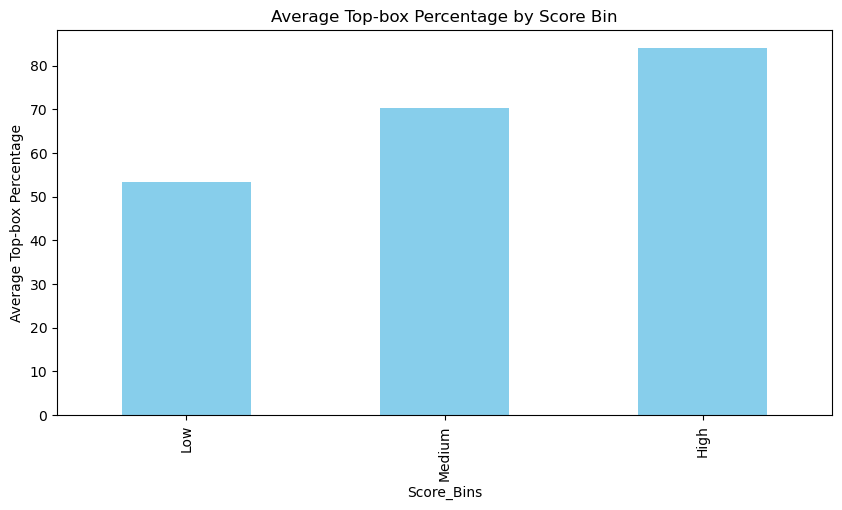

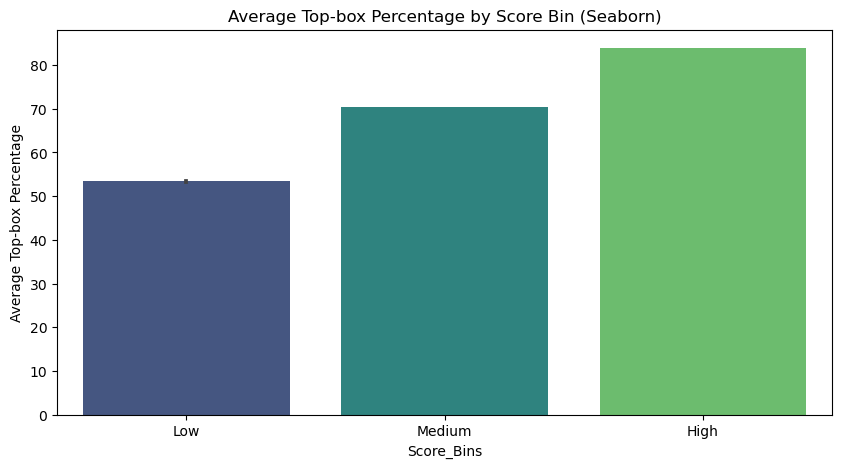

In [31]:
# Matplotlib bar plot
plt.figure(figsize=(10, 5))
response_regionState_clean.groupby('Score_Bins')['Top-box Percentage'].mean().plot(kind='bar', color='skyblue')
plt.ylabel('Average Top-box Percentage')
plt.title('Average Top-box Percentage by Score Bin')
plt.show()

# Seaborn bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=response_regionState_clean, x='Score_Bins', y='Top-box Percentage', palette='viridis')
plt.ylabel('Average Top-box Percentage')
plt.title('Average Top-box Percentage by Score Bin (Seaborn)')
plt.show()